In [1]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


# Importing basic libaries:

In [2]:
import numpy as np
import os
import matplotlib.pyplot as plt
import cv2

import tensorflow
import keras

from tensorflow.keras.preprocessing.image import ImageDataGenerator

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D,MaxPooling2D,Dense,Flatten,Dropout,Activation
from tensorflow.keras.optimizers import Adam

In [5]:
!pip install unrar
!unrar x '/content/drive/MyDrive/Dataset/Alzhmiers disease detection and classification/Data Augumented data/Training.rar'
!unrar x '/content/drive/MyDrive/Dataset/Alzhmiers disease detection and classification/Data Augumented data/Validation.rar'

Streaming output truncated to the last 5000 lines.
Extracting  Validation/ModerateDemented/ModerateDemented (488).JPG        30%  OK 
Extracting  Validation/ModerateDemented/ModerateDemented (489).JPG        30%  OK 
Extracting  Validation/ModerateDemented/ModerateDemented (49).JPG         30%  OK 
Extracting  Validation/ModerateDemented/ModerateDemented (490).JPG        30%  OK 
Extracting  Validation/ModerateDemented/ModerateDemented (491).JPG        30%  OK 
Extracting  Validation/ModerateDemented/ModerateDemented (492).JPG        30%  OK 
Extracting  Validation/ModerateDemented/ModerateDemented (493).JPG        30%  OK 
Extracting  Validation/ModerateDemented/ModerateDemented (494).JPG        30%  OK 
Extracting  Validation/ModerateDemented/ModerateDemented (495).JPG        30%  OK 
Extracting  Validation/ModerateDemented/ModerateDemented (496).JPG        30%  OK 
Extracting  Validation/Modera

# Dataset description:

In [18]:
path=r"/content/Training"
os.listdir(path)
print("No.of classes:",os.listdir(path))

No.of classes: ['VeryMildDemented', 'NonDemented', 'ModerateDemented', 'MildDemented']


In [19]:
training_data=ImageDataGenerator(rescale=1/255,shear_range=0.2,zoom_range=0.2,rotation_range=20,horizontal_flip=True)
testing_data=ImageDataGenerator(rescale=1/255)

In [20]:
training_set=training_data.flow_from_directory(directory=r"/content/Training",target_size=(224,224),batch_size=25,color_mode="rgb",class_mode="categorical")
testing_set=testing_data.flow_from_directory(directory=r"/content/Validation",target_size=(224,224),batch_size=1,class_mode="categorical")

Found 12395 images belonging to 4 classes.
Found 7210 images belonging to 4 classes.


# plotting the sample Images:


In [21]:
#Plotting the sample images in the categories:
# Load images
# After Cropping:
MD = cv2.imread(r"/content/Validation/MildDemented/MildDemented (1).JPG")
MoD = cv2.imread(r"/content/Validation/ModerateDemented/ModerateDemented (1).JPG")
ND = cv2.imread(r"/content/Validation/NonDemented/NonDemented (1).JPG")
VMD = cv2.imread(r"/content/Validation/VeryMildDemented/verymilddemented (1).JPG")

Text(0.5, 1.0, 'Very Mild demented')

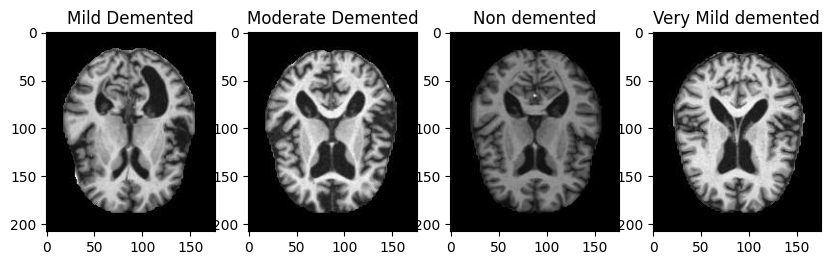

In [22]:
# Create a figure with subplots
fig, axes = plt.subplots(nrows=1, ncols=4, figsize=(10, 5))

# Display images in subplots
axes[0].imshow(cv2.cvtColor(MD, cv2.COLOR_BGR2RGB))
axes[0].set_title("Mild Demented")
axes[1].imshow(cv2.cvtColor(MoD, cv2.COLOR_BGR2RGB))
axes[1].set_title("Moderate Demented")
axes[2].imshow(cv2.cvtColor(ND, cv2.COLOR_BGR2RGB))
axes[2].set_title("Non demented")
axes[3].imshow(cv2.cvtColor(VMD, cv2.COLOR_BGR2RGB))
axes[3].set_title("Very Mild demented")

# CNN Model Architecture:

In [10]:
model=Sequential()

model.add(Conv2D(filters=64,kernel_size=(5,5),padding="same",activation="relu",input_shape=(224,224,3)))
model.add(MaxPooling2D(pool_size=2))

model.add(Conv2D(filters=128,kernel_size=(2,2),padding="same",activation="relu"))
model.add(MaxPooling2D(pool_size=2))

model.add(Conv2D(filters=128,kernel_size=(2,2),padding="same",activation="relu"))
model.add(MaxPooling2D(pool_size=2))

model.add(Flatten())
model.add(Dense(500,activation="relu"))

model.add(Dense(4,activation="softmax"))

In [11]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 224, 224, 64)      4864      
                                                                 
 max_pooling2d (MaxPooling2D  (None, 112, 112, 64)     0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 112, 112, 128)     32896     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 56, 56, 128)      0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 56, 56, 128)       65664     
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 28, 28, 128)      0

In [23]:
model.compile(optimizer="Adam",loss="categorical_crossentropy",metrics=["accuracy"])

In [24]:
history=model.fit(training_set,validation_data=testing_set,epochs=10,batch_size=5)

Epoch 1/10
496/496 [==============================] - 189s 366ms/step - loss: 1.1421 - accuracy: 0.4846 - val_loss: 0.8907 - val_accuracy: 0.6166
Epoch 2/10
496/496 [==============================] - 197s 398ms/step - loss: 0.8966 - accuracy: 0.6087 - val_loss: 0.6804 - val_accuracy: 0.7033
Epoch 3/10
496/496 [==============================] - 194s 391ms/step - loss: 0.7493 - accuracy: 0.6694 - val_loss: 0.6542 - val_accuracy: 0.7087
Epoch 4/10
496/496 [==============================] - 194s 391ms/step - loss: 0.6663 - accuracy: 0.7100 - val_loss: 0.5348 - val_accuracy: 0.7761
Epoch 5/10
496/496 [==============================] - 187s 376ms/step - loss: 0.6040 - accuracy: 0.7394 - val_loss: 0.4773 - val_accuracy: 0.7986
Epoch 6/10
496/496 [==============================] - 194s 390ms/step - loss: 0.5587 - accuracy: 0.7615 - val_loss: 0.4193 - val_accuracy: 0.8229
Epoch 7/10
496/496 [==============================] - 195s 392ms/step - loss: 0.5110 - accuracy: 0.7797 - val_loss: 0.3782 -

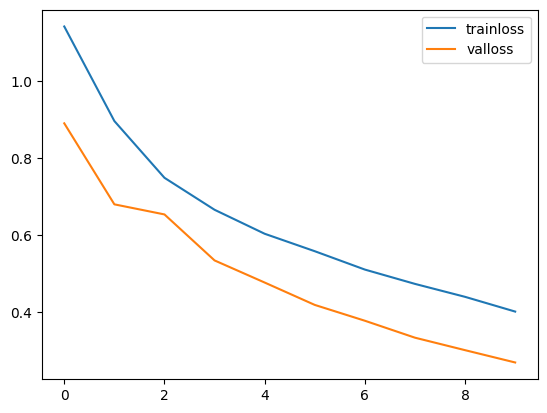

In [25]:
plt.plot(history.history["loss"],label="trainloss")
plt.plot(history.history["val_loss"],label="valloss")
plt.legend()
plt.show()

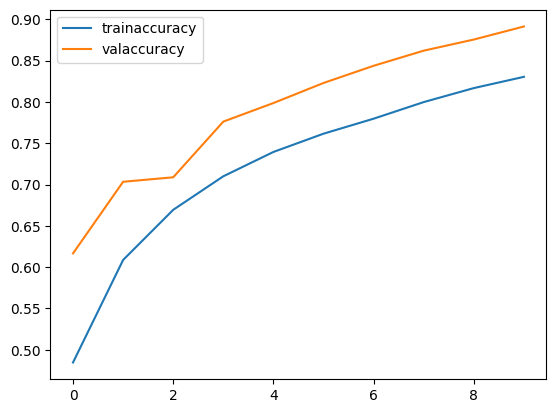

In [26]:
plt.plot(history.history["accuracy"],label='trainaccuracy')
plt.plot(history.history['val_accuracy'],label='valaccuracy')
plt.legend()
plt.show()

In [27]:
accuracy_score=model.evaluate(training_set)
print(accuracy_score)
print("Accuracy:{:.4f}%".format(accuracy_score[1]*100))
print("Loss:{:.4f}%".format(accuracy_score[0]))

496/496 [==============================] - 143s 288ms/step - loss: 0.3741 - accuracy: 0.8453
[0.3740915358066559, 0.8452602028846741]
Accuracy:84.5260%
Loss:0.3741%


In [28]:
accuracy_score=model.evaluate(testing_set)
print(accuracy_score)
print("Accuracy:{:.4f}%".format(accuracy_score[1]*100))
print("Loss:{:.4f}".format(accuracy_score[0]*100))

7210/7210 [==============================] - 38s 5ms/step - loss: 0.2698 - accuracy: 0.8913
[0.2698186933994293, 0.8912621140480042]
Accuracy:89.1262%
Loss:26.9819


In [29]:
from sklearn.metrics import confusion_matrix,ConfusionMatrixDisplay

In [30]:
y_pred=model.predict(testing_set)
y_pred=np.argmax(y_pred,axis=1)

7210/7210 [==============================] - 26s 4ms/step


In [31]:
y_pred

array([3, 0, 2, ..., 0, 0, 2])

In [32]:
cm=confusion_matrix(testing_set.classes,y_pred)
cm

array([[442, 269, 631, 428],
       [241, 136, 375, 259],
       [655, 384, 911, 629],
       [496, 286, 609, 459]])

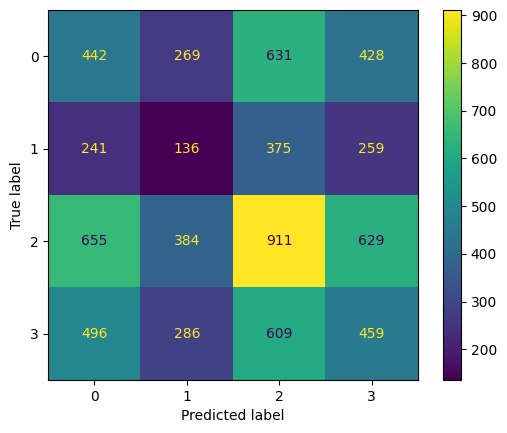

In [33]:
cm_display=ConfusionMatrixDisplay(cm)
cm_display.plot()

# Prediction:

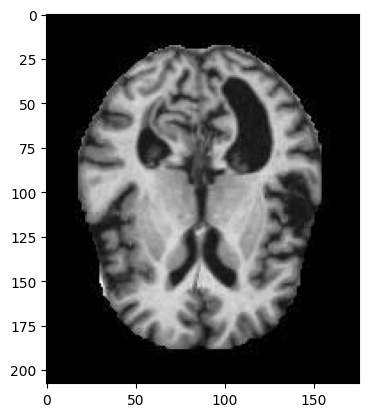

In [34]:
from skimage.io import imread
from skimage import transform

I_test=imread(r"/content/Validation/MildDemented/MildDemented (1).JPG")
plt.imshow(I_test)

In [35]:
I_test=np.array(I_test).astype("float32")/255
I_test=transform.resize(I_test,(224,224,3))
I_test=np.expand_dims(I_test,axis=0)
I_test.shape

(1, 224, 224, 3)

In [36]:
predictions=model.predict(I_test)
predictions=np.argmax(predictions)
print(predictions)

1/1 [==============================] - 0s 88ms/step
0
